## Import Data and Libraries

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Inline images for visualizations

%matplotlib inline

#set paths
path = r'Data'

#import data
hate_crime_split = pd.read_csv(os.path.join(path,'hate_crime_split.csv'))

## Clean data

In [15]:
hate_crime_split.shape

(219577, 32)

In [16]:
hate_crime_split.columns

Index(['INCIDENT_ID', 'DATA_YEAR', 'ORI', 'PUB_AGENCY_NAME', 'PUB_AGENCY_UNIT',
       'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME', 'DIVISION_NAME',
       'REGION_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC',
       'INCIDENT_DATE', 'ADULT_VICTIM_COUNT', 'JUVENILE_VICTIM_COUNT',
       'TOTAL_OFFENDER_COUNT', 'ADULT_OFFENDER_COUNT',
       'JUVENILE_OFFENDER_COUNT', 'OFFENDER_RACE', 'OFFENDER_ETHNICITY',
       'VICTIM_COUNT', 'OFFENSE_NAME.1', 'OFFENSE_NAME.2', 'OFFENSE_NAME.3',
       'TOTAL_INDIVIDUAL_VICTIMS', 'LOCATION_NAME.1', 'LOCATION_NAME.2',
       'BIAS_DESC', 'VICTIM_TYPES.1', 'VICTIM_TYPES.2', 'MULTIPLE_OFFENSE',
       'MULTIPLE_BIAS'],
      dtype='object')

In [17]:
hate_crime_split.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENSE_NAME.2,OFFENSE_NAME.3,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME.1,LOCATION_NAME.2,BIAS_DESC,VICTIM_TYPES.1,VICTIM_TYPES.2,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-Black or African American,Individual,NaN,S,S
1,3016,1991,AR0290100,Hope,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-White,Individual,NaN,S,S
2,43,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Residence/Home,NaN,Anti-Black or African American,Individual,NaN,S,S
3,44,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,Destruction/Damage/Vandalism of Property,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-White,Individual,NaN,M,S
4,3017,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Service/Gas Station,NaN,Anti-White,Individual,NaN,S,S


In [18]:
hate_crime_split.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENSE_NAME.2,OFFENSE_NAME.3,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME.1,LOCATION_NAME.2,BIAS_DESC,VICTIM_TYPES.1,VICTIM_TYPES.2,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-Black or African American,Individual,NaN,S,S
1,3016,1991,AR0290100,Hope,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-White,Individual,NaN,S,S
2,43,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Residence/Home,NaN,Anti-Black or African American,Individual,NaN,S,S
3,44,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,Destruction/Damage/Vandalism of Property,NaN,1.0,Highway/Road/Alley/Street/Sidewalk,NaN,Anti-White,Individual,NaN,M,S
4,3017,1991,AR0350100,Pine Bluff,Unknown,City,AR,Arkansas,West South Central,South,...,NaN,NaN,1.0,Service/Gas Station,NaN,Anti-White,Individual,NaN,S,S


In [19]:
hate_crime_split.isnull().sum()

INCIDENT_ID                      0
DATA_YEAR                        0
ORI                              0
PUB_AGENCY_NAME                  0
PUB_AGENCY_UNIT                  0
AGENCY_TYPE_NAME                 0
STATE_ABBR                       0
STATE_NAME                       0
DIVISION_NAME                    0
REGION_NAME                      0
POPULATION_GROUP_CODE            0
POPULATION_GROUP_DESC            0
INCIDENT_DATE                    0
ADULT_VICTIM_COUNT               0
JUVENILE_VICTIM_COUNT            0
TOTAL_OFFENDER_COUNT             0
ADULT_OFFENDER_COUNT             0
JUVENILE_OFFENDER_COUNT          0
OFFENDER_RACE                   20
OFFENDER_ETHNICITY               0
VICTIM_COUNT                     0
OFFENSE_NAME.1                   0
OFFENSE_NAME.2              212182
OFFENSE_NAME.3              219083
TOTAL_INDIVIDUAL_VICTIMS      3479
LOCATION_NAME.1                  0
LOCATION_NAME.2             219314
BIAS_DESC                        0
VICTIM_TYPES.1      

In [24]:
hate_crime_split_1 = hate_crime_split.fillna(value='None', method=None)

In [25]:
hate_crime_split_1.isnull().sum()

INCIDENT_ID                 0
DATA_YEAR                   0
ORI                         0
PUB_AGENCY_NAME             0
PUB_AGENCY_UNIT             0
AGENCY_TYPE_NAME            0
STATE_ABBR                  0
STATE_NAME                  0
DIVISION_NAME               0
REGION_NAME                 0
POPULATION_GROUP_CODE       0
POPULATION_GROUP_DESC       0
INCIDENT_DATE               0
ADULT_VICTIM_COUNT          0
JUVENILE_VICTIM_COUNT       0
TOTAL_OFFENDER_COUNT        0
ADULT_OFFENDER_COUNT        0
JUVENILE_OFFENDER_COUNT     0
OFFENDER_RACE               0
OFFENDER_ETHNICITY          0
VICTIM_COUNT                0
OFFENSE_NAME.1              0
OFFENSE_NAME.2              0
OFFENSE_NAME.3              0
TOTAL_INDIVIDUAL_VICTIMS    0
LOCATION_NAME.1             0
LOCATION_NAME.2             0
BIAS_DESC                   0
VICTIM_TYPES.1              0
VICTIM_TYPES.2              0
MULTIPLE_OFFENSE            0
MULTIPLE_BIAS               0
dtype: int64

## Histogram

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VICTIM_COUNT', ylabel='Density'>

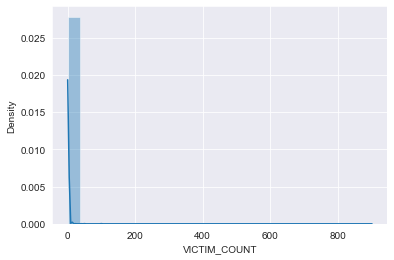

In [28]:
sns.distplot(hate_crime_split_1['VICTIM_COUNT'], bins=25)

In [30]:
hate_crime_split_1['VICTIM_COUNT'].mean()

1.2475669127458704

In [31]:
hate_crime_split_1['VICTIM_COUNT'].max()

900

In [32]:
hate_crime_split_1['VICTIM_COUNT'].median()

1.0

## Regression Analysis

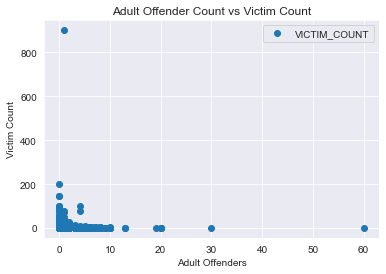

In [37]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

hate_crime_split_1.plot(x = 'ADULT_OFFENDER_COUNT', y='VICTIM_COUNT',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Adult Offender Count vs Victim Count')
plt.xlabel('Adult Offenders')
plt.ylabel('Victim Count')
plt.show()

## Hypothesis
The number of offenders does not impact the number of victims in an incident.

In [40]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = hate_crime_split_1['ADULT_OFFENDER_COUNT'].values.reshape(-1,1)
Y = hate_crime_split_1['VICTIM_COUNT'].values.reshape(-1,1)

In [41]:
X

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [42]:
Y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [46]:
X.dtype

dtype('int64')

In [47]:
# Split data into a training set and a test set.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Regression

In [48]:
regression = LinearRegression()
regression.fit(X_train, Y_train)

LinearRegression()

In [49]:
y_predicted = regression.predict(X_test)

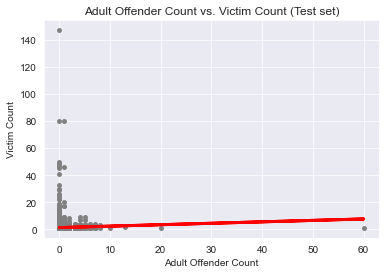

In [50]:
plot_test = plt
plot_test.scatter(X_test, Y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Adult Offender Count vs. Victim Count (Test set)')
plot_test.xlabel('Adult Offender Count')
plot_test.ylabel('Victim Count')
plot_test.show()

In [51]:
rmse = mean_squared_error(Y_test, y_predicted)
r2 = r2_score(Y_test, y_predicted)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10635981]]
Mean squared error:  1.3243001070983502
R2 score:  -0.0007857061537983601


In [53]:
y_predicted

array([[1.23785505],
       [1.23785505],
       [1.23785505],
       ...,
       [1.23785505],
       [1.23785505],
       [1.23785505]])

In [54]:
data = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2,1.237855
1,2,1.237855
2,1,1.237855
3,1,1.344215
4,1,1.237855
5,1,1.237855
6,7,1.237855
7,1,1.237855
8,1,1.237855
9,1,1.237855


In [55]:
y_predicted_train = regression.predict(X_train)  # This is predicting X_train!
rmse = mean_squared_error(Y_train, y_predicted_train)
r2 = r2_score(Y_train, y_predicted_train)
print('Slope:', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.10635981]]
Mean squared error:  6.8187337309058185
R2 score:  0.00031294816636651124


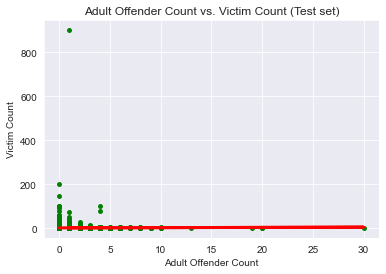

In [56]:
plot_test = plt
plot_test.scatter(X_train, Y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Adult Offender Count vs. Victim Count (Test set)')
plot_test.xlabel('Adult Offender Count')
plot_test.ylabel('Victim Count')
plot_test.show()

## Removing Outliers

In [62]:
hate_crime_split_2 = hate_crime_split_1[hate_crime_split_1['VICTIM_COUNT'] <=100]

TypeError: unsupported operand type(s) for &: 'float' and 'float'

In [63]:
hate_crime_split_3 = hate_crime_split_2[hate_crime_split_2['ADULT_OFFENDER_COUNT'] <=30]

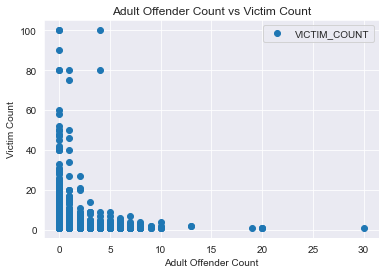

In [65]:
hate_crime_split_3.plot(x = 'ADULT_OFFENDER_COUNT', y='VICTIM_COUNT', style='o')
plt.title('Adult Offender Count vs Victim Count')
plt.xlabel('Adult Offender Count')
plt.ylabel('Victim Count')
plt.show()

In [66]:
X_2 = hate_crime_split_3['ADULT_OFFENDER_COUNT'].values.reshape(-1,1)
y_2 = hate_crime_split_3['VICTIM_COUNT'].values.reshape(-1,1)

In [67]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [68]:
regression = LinearRegression()
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [69]:
y_predicted_2 = regression.predict(X_test_2)

In [72]:
rmse1 = mean_squared_error(y_test_2, y_predicted_2)
r2_1 = r2_score(y_test_2, y_predicted_2)

In [73]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse1)
print('R2 score: ', r2_1)

Slope: [[0.06981153]]
Mean squared error:  1.003678915354283
R2 score:  0.0009732527546771896


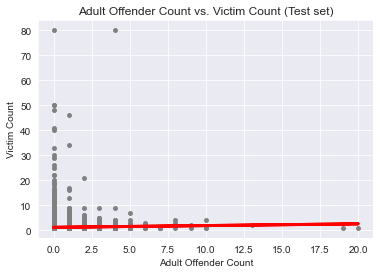

In [74]:
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Adult Offender Count vs. Victim Count (Test set)')
plot_test.xlabel('Adult Offender Count')
plot_test.ylabel('Victim Count')
plot_test.show()

The model appeared to perform well. Removing outliers did not change the results. The null hypothesis was proven to be false.